In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('retail_sales_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.set_index('Date', inplace=True)


In [7]:
monthly_sales = df['Total Amount'].resample('M').sum()


/tmp/ipython-input-3303645401.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()


In [8]:
monthly_sales_rolling = monthly_sales.rolling(window=3).mean()


In [9]:
monthly_sales_lag = monthly_sales.shift(1)


In [10]:
sales_diff = np.diff(monthly_sales)


In [11]:
sales_cumsum = np.cumsum(monthly_sales)


In [12]:
sales_df = pd.DataFrame(monthly_sales)
sales_df['lag1'] = sales_df['Total Amount'].shift(1)
sales_df.dropna(inplace=True)


In [13]:
X = sales_df[['lag1']]
y = sales_df['Total Amount']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)


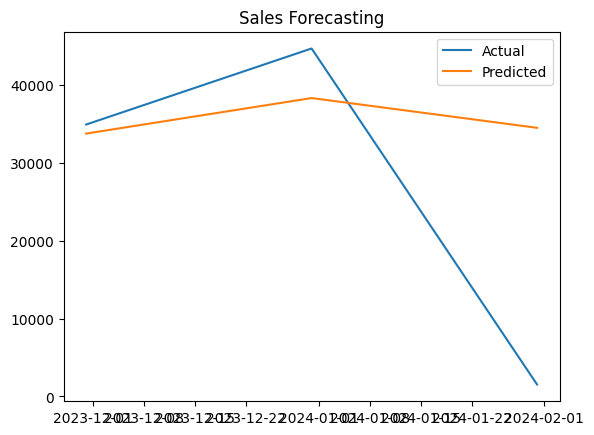

In [17]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.title("Sales Forecasting")
plt.show()


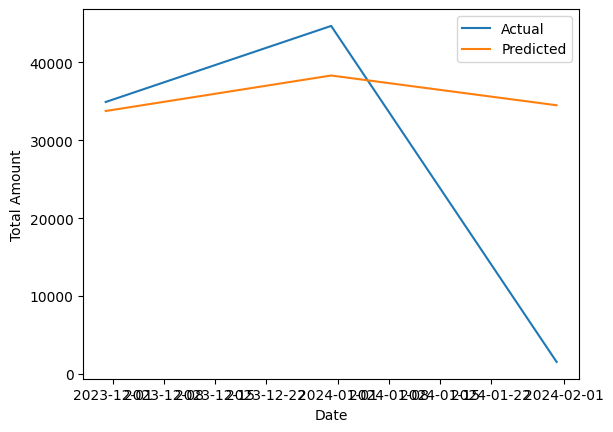

In [18]:
sns.lineplot(x=y_test.index, y=y_test, label='Actual')
sns.lineplot(x=y_test.index, y=y_pred, label='Predicted')
plt.show()
